# COGS 108 Final Project
## Winter 2018
### Group Members
Edwin Martinez PID: A11151619
<br/>Hannah Marie Valenzuela PID: A11497555
<br/>Raafat Samuail PID: A12428283
<br/>David Ossuna PID: A11245524

## Introduction and Background


Many people in the United States try to make a better life for themselves. This often implies to get a better education and get a degree in order to compete in the job market. Attending a Universtity is a way for teenagers to enter a program that trains them for a certain profession. It is no wonder why most teenageers are matriculated into a university in hopes of obtaining a job once their studies conclude.   However, university/college tuition in the United States is not free, and it's no surprise that the cost of a degree has changed. This leads us to our question,
 * How much has tuition changed over the years since the early 2000s with respect to the avarege income, and which region is more likely to leave you in less debt.


This question is important to us for different reasons. One reason being that everyone involved in this project comes from low income families, and is currently attending one of the most expensive public schools. We were wondering how much the tuition has changed. At  the same time, we were able to find datasets for income based on states and tution by states. The reason why this was important to us is because we have recently experienced an increase in tuition, and this is worrisome because there are still other materials (books, writing utensils, etc.) that aren't accounted for in our tuition.
	Based on New York Times, the costs of tuition and fees have increased about 155 dollars for a four year public school, and it reaches an average of 3000 dollars per a year. Now if we compare that price to today’s cost of attendance, we will see a massive gap in price range. In terms of financial aid, based on the College Board Organization, an undergraduate student used to get financial aid that covers all his/her tution, and in fact he/she was able to save some of it. Now this is not the case because tution seems to be increasing more as the years pass.

## Data Description

Since we decide to see the change in tution with respect to income, we needed real data that comes from the actual Department of 
Education of the United States. The Department of Education has a  public dataset that is over 230 MB in a zip file. The data 
in the zip file was from 1996/1997 to 2016/2017. In addition, the files where saved in csv files, and those files had so much 
information. The information were about all undergraduate degree-granting institutions, and included student completion, 
debt and repayment, earnings, and more. After finding the dataset that can show us the tution from creditable department, we then attempted to find another dataset that represents average income per state. Now income is another important aspect that we are 
considering. After searching for many hours, we ended up finding data from the Department of Census. Department of Census has dataset for the 
income and poverty for different years. Their data was divided by state, race, and the top 5% of popluation. This was the data that we wanted, and the one that was usable were from years of 2005 to 2009 and from 2011 to 2015. There was missing data from 2010 when looking into average income. We are not sure why this is the case, but seeing as how we're trying see a trend for income/ tuition, the trend will still be able to be observed even if one year is missing.

# Data Cleaning/ Pre-processing

When we started working with the datasets that we found, we knew it is going to take us a long time to clean it up. Since we have data for 50 states and two different datasets, no matter how big we make our graphs, the graphs will look messy. Therefore we decided to divide the states and data into different regions. The four regions were west, northeast, midwest, and south. After we have separate everything into different regions, we can drop all the unnecessary data and plot only the things that we are interseted in it like the in-state tution and out-state tution. After plotting each region with in-state and out-of-state tution, we also decided to combine them into one single average tuition. After droping many things that we did not need, now is the time to clean the dataset that we have from the Department of Census. However, the dataset that we have from them was very clean. The only thing that made it somewhat difficult to work with was that some of the data contained "$" string and "," string. In order to clean this up, we decided to remove them from the data set and make them into floating point values. We also made sure to round these values to two points after the decimal value. We also separated this data set into different regions. Also, addressing the aforementioned issue of not having income data for the year 2010, we thought it'd be a good idea to get the average value from 2009 and 2011. Then we average the two and give that value to 2010. This should not affect the overall trend we see.

In [1]:
#DATA CLEANING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_income = pd.read_csv("incomePerState.csv")
#drop district of columbia value
df_income = df_income[df_income.state != 'District of Columbia?']
df_income = df_income.sort_values('state') #sort dataframe alaphabetically


# for this part we want to separate incomes per region
West_states= ['Arizona','Colorado','Idaho','Montana','Nevada','New Mexico','Utah','Wyoming','Alaska','California','Hawaii','Oregon','Washington']
Northeast_states=['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
Midwest_states = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
South_states=['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']


df_final = pd.DataFrame(index = ['WestRegion', 'NorthEastRegion','MidwestRegion','SouthRegion'])
for x in range(2006,2016):
    west_region = []
    Northeast_region = []
    Midwest_region = []
    south_region = []

    
    for index, row in df_income.iterrows():
        if row['state'] in West_states:
            west_region.append(row[str(x)])
        elif row['state'] in Northeast_states:
            
            Northeast_region.append(row[str(x)])

        elif row['state'] in Midwest_states:
           
            Midwest_region.append(row[str(x)])

        elif row['state'] in South_states:
           
            south_region.append(row[str(x)])
        #print (row['state'])
        
    averageWest = sum(west_region)/ len(west_region)
    averageNorthEast = sum(Northeast_region)/ len(Northeast_region)
    averageMidwest = sum(Midwest_region)/ len(Midwest_region)
    averagesouth = sum(south_region)/ len(south_region)
                                          
    df_final.set_value('WestRegion',x,(format(averageWest, '.2f')))
    df_final.set_value('NorthEastRegion',x,format(averageNorthEast, '.2f'))
    df_final.set_value('MidwestRegion',x,format(averageMidwest, '.2f'))
    df_final.set_value('SouthRegion',x,format(averagesouth, '.2f'))

    

#we dont have a value for 2010, add the average between 2009 and 2011



df_final_new = df_final.T


#west
income_2009_west = df_final_new.loc[2009,'WestRegion']
income_2011_west = df_final_new.loc[2011,'WestRegion']
avg_val_west = (float(income_2009_west) + float(income_2011_west))/2
df_final_new.loc[2010,'WestRegion'] = avg_val_west

#northeast
income_2009_NorthEast = df_final_new.loc[2009,'NorthEastRegion']
income_2011_NorthEast = df_final_new.loc[2011,'NorthEastRegion']
avg_val_NorthEast = (float(income_2009_NorthEast) + float(income_2011_NorthEast))/2
df_final_new.loc[2010,'NorthEastRegion'] = avg_val_NorthEast

#midwest
income_2009_Midwest = df_final_new.loc[2009,'MidwestRegion']
income_2011_Midwest = df_final_new.loc[2011,'MidwestRegion']
avg_val_Midwest = (float(income_2009_Midwest) + float(income_2011_Midwest))/2
df_final_new.loc[2010,'MidwestRegion'] = avg_val_Midwest

#south
income_2009_South = df_final_new.loc[2009,'SouthRegion']
income_2011_South = df_final_new.loc[2011,'SouthRegion']
avg_val_South = (float(income_2009_South) + float(income_2011_South))/2
df_final_new.loc[2010,'SouthRegion'] = avg_val_South


print(df_final_new)


     WestRegion NorthEastRegion MidwestRegion SouthRegion
2006   50066.00        53947.00      47177.58    43894.80
2007   53122.08        56576.56      47991.50    46432.00
2008   54910.15        58804.11      49799.67    48125.53
2009   53120.00        57297.11      48080.50    46528.20
2010    52841.7         57350.6       48736.5     46649.6
2011   52563.38        57404.00      49392.50    46771.07
2012   53727.46        58608.89      50412.75    47536.60
2013   55678.08        59232.33      51545.00    48500.40
2014   56564.54        60921.11      53118.42    49558.47
2015   58749.38        63067.56      54904.58    51259.53


For the data above, we decided to make our indices from 2006 to 2015. In doing so, this will allow us to plot our information better. We also have our columns separated by regions. This data was mostly clean, however, we had unnecesary "$" and "," characters in our data. We removed them in order to read the data as floating point values. Also, since dealing with money values, we rounded the floating point values to two points after the decimal. This concludes our data cleaning for the average income per region.

# Data Vizualization

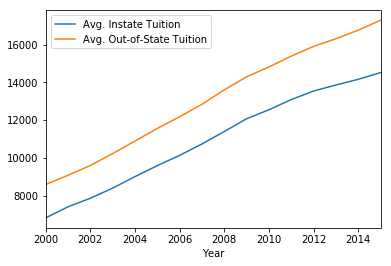

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import glob
from scipy.stats import uniform

fields=['STABBR','TUITIONFEE_IN','TUITIONFEE_OUT'] #columns to extract from CSV files

path ='CollegeScorecard_Raw_Data'
allFiles = glob.glob(path + "/*.csv")
avg_instate_tuition=[]
avg_outstate_tuition=[]
years=[] 
dfs=[] # array of dataframes for each year. Index refers to year
timeline = range(2000,2016) #range to create timeline of data we have

#for loop to fill in the timeline array with the correct years
for time in timeline:
    years.append(time)

#for loop that will fill in dfs array with dataframes corresponding to each year
#also calculates the average instate and out-of-state tuition per year
for file_ in allFiles:
    df = pd.read_csv(file_,usecols=fields)
    df.columns=['State', 'In-State Tuition', 'Out-of-State Tuition']
    dfs.append(df) 
    avg_instate = df['In-State Tuition'].mean()
    avg_outstate=df['Out-of-State Tuition'].mean()
    avg_instate_tuition.append(avg_instate)
    avg_outstate_tuition.append(avg_outstate)

#creates dataframe to hold average instate and out-of-state tution for years 2000-2015
avg_tuition = pd.DataFrame({'Year': years,'Avg. Instate Tuition': avg_instate_tuition,'Avg. Out-of-State Tuition': avg_outstate_tuition})
plt.figure();
avg_tuition.plot(x='Year'); #plot of average instate and out-of-state tution from years 2000-2015



It can be noted that the average in-state tution and out-of-state tuition have a similar trend in increase from the year 2000 to the year 2014. Although this observation and plot provides us a great overall picture for average in-state and out-of-state tution, we want to be more specfic. We will, therefore, move forward by breaking down the states into 4 regions: West, Northeast, Midwest and South and plot the average instate and out-of-state tuition for each state within the specifed region for better data visualization.

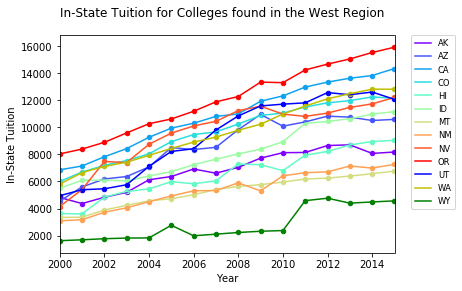

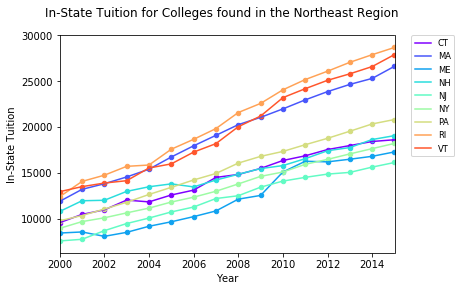

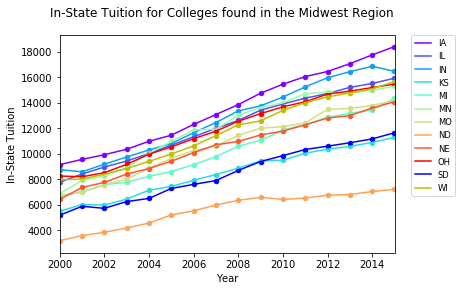

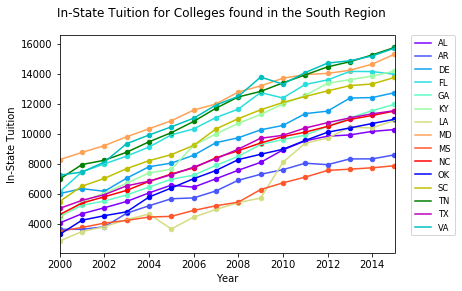

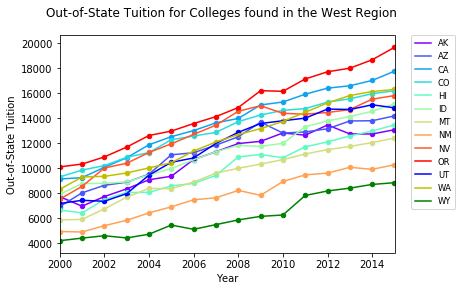

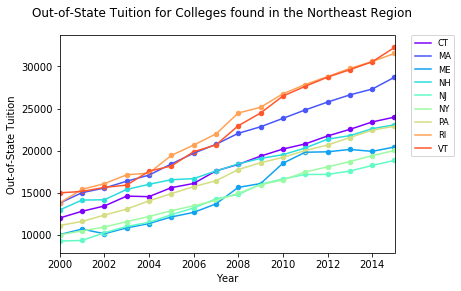

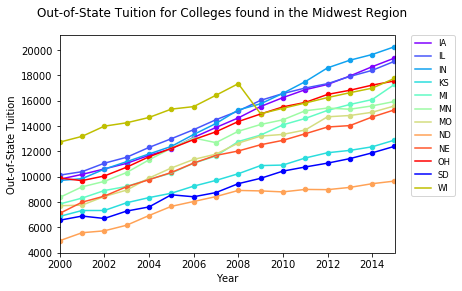

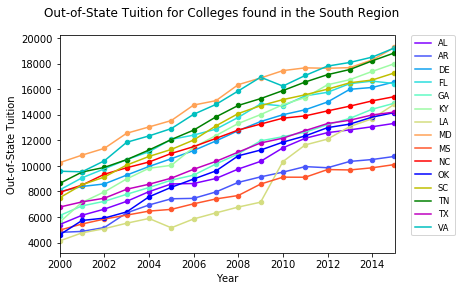

In [2]:
#loop through all dataframes in dfs array and drop na values,set index to state and sort it by state
#Calculate average instate and out-of-stae tuition by state and save it to dfs array
i = 0
for df in dfs:
    df.dropna(how='any',inplace=True)
    df['Year']=years[i]
    df = df.groupby(['State']).mean()
    dfs[i]=df
    i= i +1
result=pd.concat(dfs)
instate_tuition = result.drop('Out-of-State Tuition',axis=1)
outofstate_tuition = result.drop('In-State Tuition',axis=1)


West= ['AZ','CO','ID','MT','NV','NM','UT','WY','AK','CA','HI','OR','WA']
Northeast=['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
Midwest = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
South=['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']

#The following code is to help create different colors for each state
colors = ['r', 'b','y','g','m','c','k','w']
X = [1,2,3,4]
Ys = np.array([[4,8,12,16],
      [1,4,9,16],
      [17, 10, 13, 18],
      [9, 10, 18, 11],
      [4, 15, 17, 6],
      [7, 10, 8, 7],
      [9, 0, 10, 11],
      [14, 1, 15, 5],
      [8, 15, 9, 14],
       [20, 7, 1, 5]])
nCols = len(X)  
nRows = Ys.shape[0]
rain_colors = cm.rainbow(np.linspace(0, 1, len(Ys)))
cs = [rain_colors[i//len(X)] for i in range(len(Ys)*len(X))]

#Begin creating graph in-state tuition for West States
fig, ax = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the West Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in West:
        if index > len(colors):
            ax = grp.plot(ax=ax, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            ax = grp.plot(ax=ax, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            ax = grp.plot(ax=ax, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            ax = grp.plot(ax=ax, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph in-state tuition for Northeast States
fig, bx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the Northeast Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in Northeast:
        if index > len(colors):
            bx = grp.plot(ax=bx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            bx = grp.plot(ax=bx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            bx = grp.plot(ax=bx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            bx = grp.plot(ax=bx, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph in-state tuiton for Midwest States
fig, cx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the Midwest Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in Midwest:
        if index > len(colors):
            cx = grp.plot(ax=cx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            cx = grp.plot(ax=cx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            cx = grp.plot(ax=cx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            cx = grp.plot(ax=cx, kind='scatter', x='Year', y='In-State Tuition',  c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig, dx = plt.subplots()
fig.suptitle('In-State Tuition for Colleges found in the South Region')
index = 0
j = 0
for key, grp in instate_tuition.groupby(['State']):
    if key in South:
        if index > len(colors):
            dx = grp.plot(ax=dx, kind='line', x='Year', y='In-State Tuition', label=key, c = colors[j])
            dx = grp.plot(ax=dx, kind='scatter', x='Year', y='In-State Tuition', c = colors[j])
            j = j +1
        else:  
            dx = grp.plot(ax=dx, kind='line', x='Year', y='In-State Tuition', label=key, c = rain_colors[index])
            dx = grp.plot(ax=dx, kind='scatter', x='Year', y='In-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Now plot out-of-state tuition trends per region
fig, ex = plt.subplots()
fig.suptitle('Out-of-State Tuition for Colleges found in the West Region')
index = 0
j = 0
for key, grp in outofstate_tuition.groupby(['State']):
    if key in West:
        if index > len(colors):
            ex = grp.plot(ax=ex, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = colors[j])
            ex = grp.plot(ax=ex, kind='scatter', x='Year', y='Out-of-State Tuition', c = colors[j])
            j = j +1
        else:  
            ex = grp.plot(ax=ex, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = rain_colors[index])
            ex = grp.plot(ax=ex, kind='scatter', x='Year', y='Out-of-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph out-of-state tuition for Northeast States
fig, fx = plt.subplots()
fig.suptitle('Out-of-State Tuition for Colleges found in the Northeast Region')
index = 0
j = 0
for key, grp in outofstate_tuition.groupby(['State']):
    if key in Northeast:
        if index > len(colors):
            fx = grp.plot(ax=fx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = colors[j])
            fx = grp.plot(ax=fx, kind='scatter', x='Year', y='Out-of-State Tuition', c = colors[j])
            j = j +1
        else:  
            fx = grp.plot(ax=fx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = rain_colors[index])
            fx = grp.plot(ax=fx, kind='scatter', x='Year', y='Out-of-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#Reset variables needed and graph out-of-state tuiton for Midwest States
fig, gx = plt.subplots()
fig.suptitle('Out-of-State Tuition for Colleges found in the Midwest Region')
index = 0
j = 0
for key, grp in outofstate_tuition.groupby(['State']):
    if key in Midwest:
        if index > len(colors):
            gx = grp.plot(ax=gx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = colors[j])
            gx = grp.plot(ax=gx, kind='scatter', x='Year', y='Out-of-State Tuition', c = colors[j])
            j = j +1
        else:  
            gx = grp.plot(ax=gx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = rain_colors[index])
            gx = grp.plot(ax=gx, kind='scatter', x='Year', y='Out-of-State Tuition',  c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig, hx = plt.subplots()
fig.suptitle('Out-of-State Tuition for Colleges found in the South Region')
index = 0
j = 0
for key, grp in outofstate_tuition.groupby(['State']):
    if key in South:
        if index > len(colors):
            hx = grp.plot(ax=hx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = colors[j])
            hx = grp.plot(ax=hx, kind='scatter', x='Year', y='Out-of-State Tuition', c = colors[j])
            j = j +1
        else:  
            hx = grp.plot(ax=hx, kind='line', x='Year', y='Out-of-State Tuition', label=key, c = rain_colors[index])
            hx = grp.plot(ax=hx, kind='scatter', x='Year', y='Out-of-State Tuition', c = rain_colors[index])
            index = index +1
        
plt.legend(fontsize='small',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
    

The above plots have shown us a rough estimate for the tuition brackets states have fallen in from the year 2000 to 2015. Let's compare the average in-state and out-of-state tuition from region to region on one graph. 

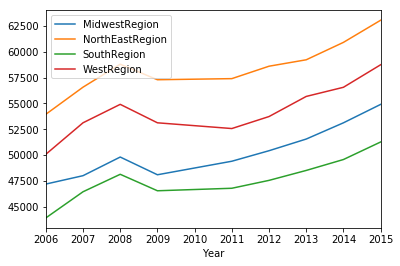

In [24]:


average_income_per_region = pd.DataFrame({"Year":df_final_new.index.tolist(),"WestRegion":df_final_new.WestRegion.tolist(),
                                         "NorthEastRegion":df_final_new.NorthEastRegion.tolist(), "MidwestRegion":df_final_new.MidwestRegion.tolist(),
                                         "SouthRegion":df_final_new.SouthRegion.tolist()})

average_income_per_region = average_income_per_region.astype(float)

#rearrange to make the data look clearer
average_income_per_region.plot(x="Year")
plt.show()


In the above graph, we see the average income over the course of about 10 years. This data is split up between regions in the United States. The regions are specified in the graph legend.

# Data Analysis and Results




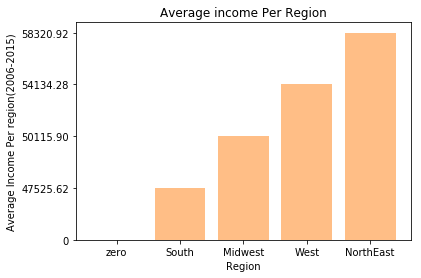

In [83]:



# we want the average income across all the years for each region

average_for_south_region = sum(average_income_per_region['SouthRegion']) / len(average_income_per_region['SouthRegion'])
average_for_midwest_region = sum(average_income_per_region['MidwestRegion']) / len(average_income_per_region['MidwestRegion'])
average_for_west_region = sum(average_income_per_region['WestRegion']) / len(average_income_per_region['WestRegion'])
average_for_northeast_region = sum(average_income_per_region['NorthEastRegion']) / len(average_income_per_region['NorthEastRegion'])


#format to round to the nearest hundredths place
average_for_south_region = format(average_for_south_region,'.2f')
average_for_midwest_region = format(average_for_midwest_region,'.2f')
average_for_west_region = format(average_for_west_region,'.2f')
average_for_northeast_region = format(average_for_northeast_region,'.2f')




objects = ('zero','South', 'Midwest', 'West', 'NorthEast')
y_pos = np.arange(len(objects))
performance = [0,average_for_south_region,average_for_midwest_region,average_for_west_region,average_for_northeast_region]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Income Per region(2006-2015)')
plt.xlabel('Region')

plt.title('Average income Per Region')



 
plt.show()

# Privacy/Ethics Considerations

When looking for data, we made sure to take our data into careful consideration. We understand that some of the information must be kept private because it involves personal details about certain individuals. We looked at several data sets that involved zip codes and city names; we were prepared to clean these variables, but we felt the dataset was insufficient, so it was not used. The current data we used contained state names, and though state names are not a huge privacy issue, we decided to leave them out since they weren't necessary for our data conclusion. Other than that, the data we used contained only numbers. Moreover, these numbers were income values that were used during our data analysis.

# Conclusions and Discussion 

Our conslusions were a bit surprising. We initially expected the west to be the most expensive since we believe the most expensive schools are here in California. However, it turn out that the area with the biggest tuition to income ratio was {INSERT ACTUAL AREA HERE}. Compared to the other regions we measured, the west had a tuition/income ratio of {INSERT VALUE HERE}, the NorthEast had a ratio of{INSERT VALUE}, MidWest a ratio of{INSERT VALYUE}, and South a ratio of{INSERT VALUE}. This data is important because we can observe the relationship between the average income of a region on the united states, and compare that with the tuition of said area. In other words, we can observe which regions in the united states contain the highest cost for education, and when comparing them with the average income, we choose whether a student will likely be in debt or not. Much to our surprise, the area where one is least likely to be in debt is {INSERT AREA HERE} 